In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel ('monthly export amount2.xlsx')
df

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
1,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,...,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
2,38223018,35866026,41532719,39443013,39852981,39387232,35048576,37669038,35534156,37291389,...,51935479,49858132,55511984,51068508,48912380,49320631,49234963,50888374,47479186,49775699


In [3]:
df =df.transpose()

In [4]:
df.columns = ['ID','Datetime','Total']
df

,ID,Datetime,Total
0,0,2007-01-01,38223018
1,1,2007-02-01,35866026
2,2,2007-03-01,41532719
3,3,2007-04-01,39443013
4,4,2007-05-01,39852981
...,...,...,...
151,151,2019-08-01,49320631
152,152,2019-09-01,49234963
153,153,2019-10-01,50888374
154,154,2019-11-01,47479186


In [5]:
df['ID'] = df['ID'].astype(np.float64)
df['Total'] = df['Total'].astype(np.float64)

In [6]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

In [7]:
import math

total_size=len(df)
split = 144 / 156
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

Holt (1957) and Winters (1960) extended Holt’s method to capture seasonality. The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level  ℓt, one for the trend  bt, and one for the seasonal component  st, with corresponding smoothing parameters  α,  β∗ and  γ. We use  m to denote the frequency of the seasonality, i.e., the number of seasons in a year. For example, for quarterly data  m=4, and for monthly data  m=12.
 
Exponential smoothing assigns exponentially decreasing weights and values against historical data to decrease the value of the weight for the older data. In other words, more recent historical data is assigned more weight in forecasting than the older results.

There are two variations to this method that differ in the nature of the seasonal component. The additive method is preferred when the seasonal variations are roughly constant through the series, while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series. With the additive method, the seasonal component is expressed in absolute terms in the scale of the observed series, and in the level equation the series is seasonally adjusted by subtracting the seasonal component. Within each year, the seasonal component will add up to approximately zero. With the multiplicative method, the seasonal component is expressed in relative terms (percentages), and the series is seasonally adjusted by dividing through by the seasonal component. Within each year, the seasonal component will sum up to approximately m.

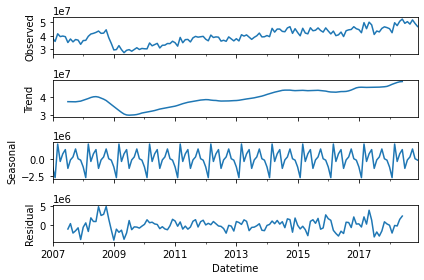

In [8]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train.Total).plot()
result = sm.tsa.stattools.adfuller(train.Total)
plt.show()

In [21]:
# Create prediction table
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

y_hat = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Total']),seasonal_periods=12 ,trend='add', seasonal='add').fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test))

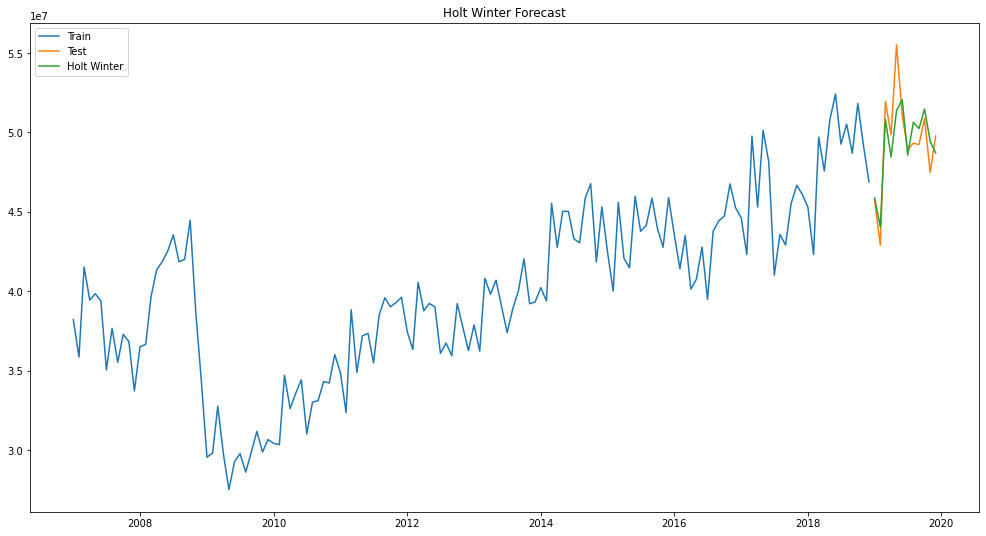

In [22]:
#Plotting data
plt.figure(figsize=(17,9))
plt.plot(train.index, train['Total'], label='Train')
plt.plot(test.index,test['Total'], label='Test')
plt.plot(y_hat.index,y_hat['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.title("Holt Winter Forecast")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Total, y_hat.Holt_Winter))/10000000
print('RMSE = '+str(rms))

RMSE = 0.15998220599945745


The same calculation to the import data.

In [24]:
df2 = pd.read_excel ('monthly import amount2.xlsx')

In [25]:
df2 =df2.transpose()
df2.columns = ['ID','Datetime','Total']
df2

,ID,Datetime,Total
0,0,2007-01-01,32224562
1,1,2007-02-01,32242267
2,2,2007-03-01,37580303
3,3,2007-04-01,34869515
4,4,2007-05-01,35548764
...,...,...,...
151,151,2019-08-01,51815887
152,152,2019-09-01,49366806
153,153,2019-10-01,51827652
154,154,2019-11-01,47939304


In [26]:
df2['ID'] = df2['ID'].astype(np.float64)
df2['Total'] = df2['Total'].astype(np.float64)

In [27]:
df2.Datetime = pd.to_datetime(df2.Datetime,format='%Y-%m-%d %H:%M') 
df2.index = df2.Datetime

In [28]:
total_size2 =len(df2)
split = 144 / 156
train_size2 = math.floor(split*total_size2)
train2 = df2.head(train_size2)
test2 = df2.tail(len(df2) -train_size2)

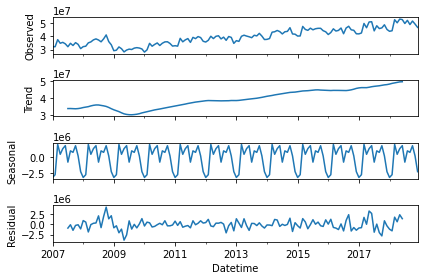

In [29]:
sm.tsa.seasonal_decompose(train2.Total).plot()
result = sm.tsa.stattools.adfuller(train2.Total)
plt.show()

In [30]:
y_hat2 = test2.copy()
fit2 = ExponentialSmoothing(np.asarray(train2['Total']),seasonal_periods=12 ,trend='mul', seasonal='mul',).fit()
y_hat2['Holt_Winter'] = fit2.forecast(len(test2))

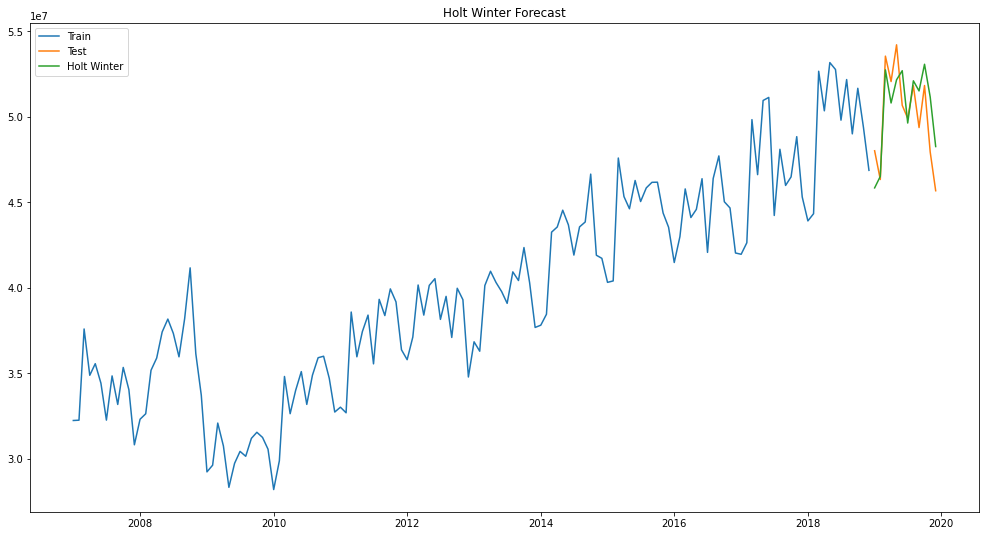

In [31]:
plt.figure(figsize=(17,9))
plt.plot(train2.index, train2['Total'], label='Train')
plt.plot(test2.index,test2['Total'], label='Test')
plt.plot(y_hat2.index,y_hat2['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.title("Holt Winter Forecast")
plt.show()

In [32]:
rms2 = sqrt(mean_squared_error(test2.Total, y_hat2.Holt_Winter))
print('RMSE = '+str(rms2))

RMSE = 1793769.2431076672
